['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']
x.shape =  (12, 1)


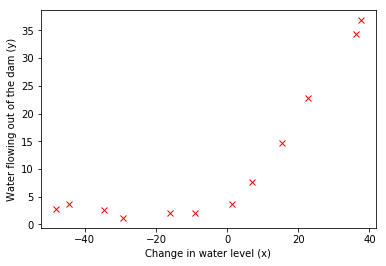

In [44]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from linear_reg_cost_function import linear_reg_cost_function

mat_data = sio.loadmat('data/ex5data1.mat')
print mat_data.keys()
X = mat_data['X']
print 'x.shape = ',X.shape
y = mat_data['y'].ravel()
X_test = mat_data['Xtest']
y_test = mat_data['ytest'].ravel()
X_val = mat_data['Xval']
y_val = mat_data['yval'].ravel()
m = X.shape[0]
m_val = X_val.shape[0]
m_test = X_test.shape[0]

plt.figure()
plt.plot(X, y, linestyle='', marker='x', color='r')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### cost function:
<img src='pic/liner_reg_cost_fun.jpg' width=60% height=60%/>
### gradient:
梯度下降的公式推导可以看exe1<br>
<img src='pic/linear_cost_gradient.jpg' width=60% height=60%>

In [65]:
def linear_reg_cost_function(theta, X, y,  lambda_):
    """
    X is an two dimen array: each col is a feature,and each row is an example
    注意正则化部分是不计算theta0的
    """
    H = theta.dot(X.T)
    m  = X.shape[0]
    J = 1.0/(2*m)*np.sum(np.square(H-y)) + lambda_/(2.0*m) * np.sum(theta[1:])

    #梯度计算
    grad = np.zeros(theta.shape[0])
#     grad[0] = 1.0/m*np.sum((H - y)*1)
#     grad[1:] = (1.0/m*np.sum((H - y).dot(X[:,1:])) + lambda_/m*theta[1:])
    mask = np.eye(len(theta))
    mask[0, 0] = 0
    grad = 1.0 / m * X.T.dot(X.dot(theta) - y) + 1.0 * lambda_ / m * (mask.dot(theta))

    return (J, grad)


XX = np.c_[np.ones(X.shape[0]), X]
init_theta = np.ones(XX.shape[1])
linear_reg_cost_function(init_theta, XX, y,  1)


(303.99319222026429, array([ -15.30301567,  598.25074417]))

In [46]:
import scipy.optimize as opt
def train_linear_reg(X, y, l, iteration=200):

    m, n = X.shape
    initial_theta = np.zeros((n, 1))

    result = opt.minimize(fun=linear_reg_cost_function, x0=initial_theta, args=(X, y, l), method='TNC', jac=True,
                          options={'maxiter': iteration})

    return result.x



## Training Linear regression
The train_linear_reg() trains linear regression with given dataset and regularization parameter.because of  the regularization will not be incredibly helpful for a θ of such low dimension


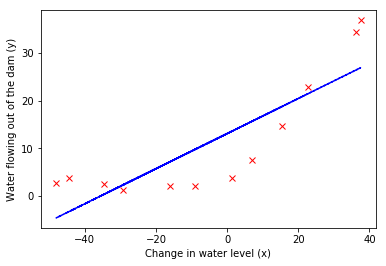

In [47]:
l = 0.0
theta = train_linear_reg(np.hstack((np.ones((m, 1)), X)), y, l)

pred = np.hstack((np.ones((m, 1)), X)).dot(theta)

plt.figure()
plt.plot(X, y, linestyle='', marker='x', color='r')
plt.plot(X, pred, linestyle='--', marker='', color='b')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()


### Learning curve

In [85]:
def learning_curve(X, y, X_val, y_val, l):
#     m = X.shape[0]
#     J_train = np.zeros(m)
#     J_val = np.zeros(m)
#     for i in range(1, m+1):
#         X_train = X[:i, :]
#         Y_train = y[:i]
#         theta = train_linear_reg(X_train, Y_train, 1.0)

#         #linear_reg_cost_function 方法的时候暂时没有加入x0,需要在上层添加
#         J_train[i-1] = linear_reg_cost_function(theta, X_train, Y_train, 0)[0]
#         J_val[i-1] = linear_reg_cost_function(theta, X_val, y_val, 0)[0]

#     return (J_train, J_val)
    m = X.shape[0]
    m_val = X_val.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(1, m + 1):
        theta = train_linear_reg(X[:i, ], y[:i, ], l)
        error_train[i - 1] = 1.0 / (2 * i) * np.sum(np.square(X[:i, ].dot(theta) - y[:i, ]))
        error_val[i - 1] = 1.0 / (2 * m_val) * np.sum(np.square(X_val.dot(theta) - y_val))

    return error_train, error_val



### Plot Learning curve

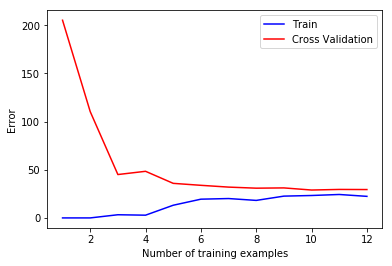

# Training Examples / Train Error / Cross Validation Error
  1                   0.00000000    205.12109571
  2                   0.00000000    110.30264078
  3                   3.28659505    45.01023135
  4                   2.84267769    48.36891025
  5                   13.15404881   35.86516477
  6                   19.44396251   33.82996152
  7                   20.09852166   31.97098583
  8                   18.17285870   30.86244631
  9                   22.60940542   31.13599791
  10                  23.26146159   28.93620747
  11                  24.31724959   29.55143162
  12                  22.37390650   29.43381813


In [86]:
l = 0.0
error_train, error_val = learning_curve(np.hstack((np.ones((m, 1)), X)), y, np.hstack((np.ones((m_val, 1)), X_val)), y_val, l)

plt.figure()
plt.plot(range(1, m + 1), error_train, color='b', label='Train')
plt.plot(range(1, m + 1), error_val, color='r', label='Cross Validation')
plt.legend(loc='upper right')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

print '# Training Examples / Train Error / Cross Validation Error'
for i in range(m):
    print '  {0:<19} {1:<13.8f} {2:<.8f}'.format(i + 1, error_train[i], error_val[i])
    

### High bias
训练集和测试集loss都比较大，是典型的high bias，所有会用多项式去刻画改进 <br>
you can observe that both the train error and cross validation
error are high when the number of training examples is increased. This
reflects a high bias problem in the model – the linear regression model is too simple and is unable to fit our dataset well. In the next section, you will
implement polynomial regression to fit a better model for this dataset.

1.将x映射为多项式：Maps X (1D vector) into the p-th power. <br>
2.标准化，如果不标准化，那么有些数值会变的非常大，所有标准化也能加速收敛 <br>

In [50]:
def poly_features(X, p):
    """
    Maps X (1D vector) into the p-th power.
    """
    X_poly = np.zeros((len(X), p))

    for i in range(p):
        X_poly[:, i] = np.power(X, i + 1).ravel()

    return X_poly

def feature_normalize(X, mu=None, sigma=None):
    """
    Normalizes the features in x.
    """
    if mu is None:
        mu = np.mean(X, axis=0)

    if sigma is None:
        sigma = np.std(X, ddof=1, axis=0)

    X_norm = (X - mu) / sigma

#     mu = np.mean(X, axis=0)
#     sigma = np.std(X, ddof=1, axis=0)
#     X_norm = (X - mu) / sigma
    
#     mean = X.mean(axis=0)
#     std = X.std(axis=0)
#     X_norm = (X-mean)/std
    
    return X_norm, mu, sigma


def plot_fit(min_x, max_x, mu, sigma, theta, p):
    """
    根据计算得到的参数，画出h(x)的曲线图
    Plots a learned polynomial regression fit over an existing figure.
    """
    x = np.arange(min_x - 15, max_x + 25, 0.05)
    X_poly = poly_features(x, p)  #add feature
    X_poly, dummy_mu, dummy_sigma = feature_normalize(X_poly, mu, sigma) #正则化
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly)) #构造x0
    plt.plot(x, X_poly.dot(theta), linestyle='--', marker='', color='b') #plot
    

### 画出曲线图，看下刻画情况
1.从结果可以看，因为正则化系数lambda为0，所以可以看见多项式刻画数据集很精确，但是泛化性不好，High variance的体现 <br>
2.cost图中，训练集和交叉验证集，中间存在gap，也是High variance的体现

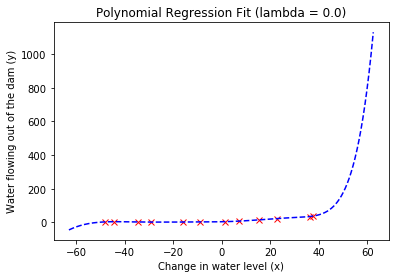

In [66]:
#将训练集，交叉验证集，测试集分别add feature ，标准化
p = 8
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.hstack((np.ones((m, 1)), X_poly))


# print 'X_poly.shape = ',X_poly.shape,X.shape
# print '',X_poly[:,:4]

X_poly_test = poly_features(X_test, p)
X_poly_test, dummy_mu, dummy_sigma = feature_normalize(X_poly_test, mu, sigma)
X_poly_test = np.hstack((np.ones((m_test, 1)), X_poly_test))

X_poly_val = poly_features(X_val, p)
X_poly_val, dummy_mu, dummy_sigma = feature_normalize(X_poly_val, mu, sigma)
X_poly_val = np.hstack((np.ones((m_val, 1)), X_poly_val))


#plot h(x)
l = 0.0
theta = train_linear_reg(X_poly, y, l, iteration=500)

plt.figure()
plt.plot(X, y, linestyle='', marker='x', color='r') #画原始数据点
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p) #刻画h(x)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = {})'.format(l))
plt.show()


Plot the learning curve for polynomial regression:

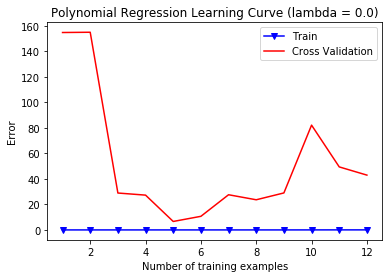

In [90]:
l = 0.0
J_train, J_val = learning_curve(np.hstack((np.ones((X_poly.shape[0], 1)), X_poly)), y, np.hstack((np.ones((X_poly_val.shape[0], 1)), X_poly_val)), y_val, l)
# error_train, error_val = learning_curve(X_poly, y, X_poly_val, y_val, 0.0)
plt.figure()
plt.plot(range(1, m + 1), J_train, color='b', marker='v', label='Train')
plt.plot(range(1, m + 1), J_val, color='r', label='Cross Validation')
plt.legend(loc='upper right')
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(l))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
# plt.xlim((0, 12))
# plt.ylim((0, 40))
plt.show()

### Validation for Selecting Lambda
we can see that the best value of λ is around 3., the cross validation error <br>
can sometimes be lower than the training error.

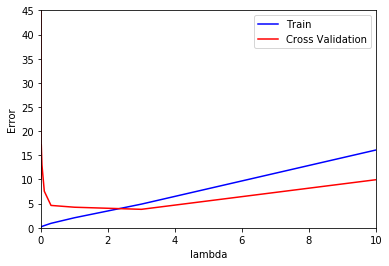

# lambda / Train Error / Validation Error
  0.0      0.02991107    45.18541474
  0.001    0.11229959    10.13916356
  0.003    0.17135417    16.24671543
  0.01     0.22044675    17.18285930
  0.03     0.28231014    13.03011673
  0.1      0.45787936    7.56950778
  0.3      0.92346833    4.63177637
  1.0      2.07702755    4.25940487
  3.0      4.90085874    3.82305108
  10.0     16.09168213   9.94536559


In [71]:
def validation_curve(x, y, x_val, y_val):
    """
    Generate the train and validation errors needed to plot a validation curve that we can use to select lambda.
    """
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    m = x.shape[0]
    m_val = x_val.shape[0]
    for i in range(len(lambda_vec)):
        l = lambda_vec[i]
        theta = train_linear_reg(x, y, l)
        error_train[i] = 1.0 / (2 * m) * np.sum(np.square(x.dot(theta) - y))
        error_val[i] = 1.0 / (2 * m_val) * np.sum(np.square(x_val.dot(theta) - y_val))

    return lambda_vec, error_train, error_val



lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, y_val)

plt.figure()
plt.plot(lambda_vec, error_train, color='b', label='Train')
plt.plot(lambda_vec, error_val, color='r', label='Cross Validation')
plt.legend(loc='upper right')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.xlim((0, 10))
plt.ylim((0, 45))
plt.show()

print '# lambda / Train Error / Validation Error'
for i in range(len(lambda_vec)):
    print '  {0:<8} {1:<13.8f} {2:<.8f}'.format(lambda_vec[i], error_train[i], error_val[i])
    
    

#### lambda分别为0，1，2.8的learning curve
<center class="half">
    <img src='pic/linear_reg_lambda0.png' width=30% height=30%/>
    <img src='pic/linear_reg_lambda1.png' width=30% height=30%/>
    <img src='pic/linear_reg_lambda3.png' width=30% height=30%/>
</center>

### Test

In [100]:
# X_poly_test
l = 3.0
theta = train_linear_reg(X_poly, y, l)
m = X_poly_test.shape[0]
error_test = 1.0 / (2 * m) * np.sum(np.square(X_poly_test.dot(theta) - y_test))
error_test

3.859433929058433